# Few parameter scaling for COVID-19 confirmed cases time series


## Model

We assume a simple dynamics for the increase of confirmed cases $N$:
$$
\frac{dN}{d\bar t} = N \cdot ( 1 - N/r) \,,
$$
where $\bar t$ is the natural intrinsic time scale of the virus spreading and $r$ is the maximum number of confirmed cases which we want to fit. $r$ is the net effect of all measures applied by a country to stop the spreading.

Being a separable differential equation, one gets
$$
 \bar t  = \ln \frac{N}{1-N/r} + {\rm const}
$$
This equation is the basis for collapsing all data on a single curve.

From this equation 
$$
 N = \frac{r}{1+ r \cdot \exp(-(\bar t - \bar t_0))}
$$
The pure exponential growth is recovered in the limit $r \to \infty$.

## Data

We have the daily numbers of confirmed COVID-19 cases by countries online at
https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

The time series consists of days $[t_i]$ and confirmed case $[N_i]$.

As confirmed by many, the initial increase after the outbreak is exponential.

Before the outbreak in each country one can see some confirmed cases which are imported to a country by traveling from some infested region.



## Fitting

Note that for any mathematical model, at least 3 fitting parameters are required (for each country)
* The unknown scale of the infection rate in units of days. Ideally, this should be independent of the country
* The time of the outbreak defining $\bar t_0$
* The predicted value of the total number of case $r$

For each country, we model the series using
$$
 t_i = A \ln \frac{N_i}{1-N_i/r} + B \,,
$$
where $A$ is basically the doubling rate (modulo factors of $ln 2$), $B$ is related to the time shift.



To remove the initial imported cases, we take data for each country starting with the first day over 50 cases.


## Results




loading ... 
Country      Current    Total    Rate
---------  ---------  -------  ------
de             22213    70094    3.59
it             53578    71751    4.07
jp              1007     1422    8.45
uk              5018    63957    4.16
kr              8799     9500    3
es             25374    37600    2.91
hu               103      209    3.63
fr             14282    21830    3.53
at              2814     4761    3.11
ch              6575    17671    3.7
ro               367      768    4.13


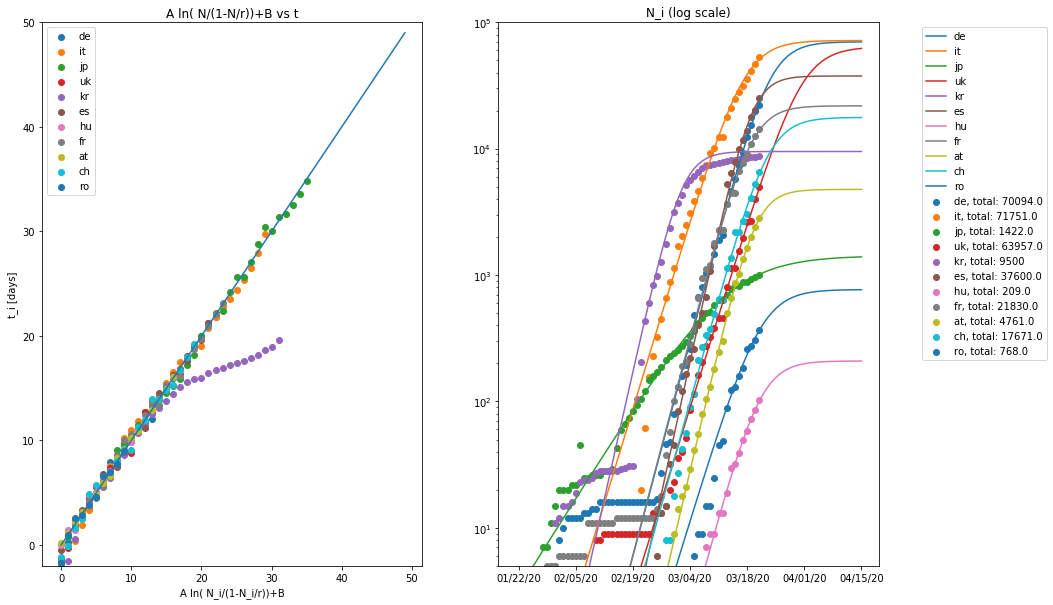

In [24]:
import sys
sys.path.insert(0, './COVID19') 
from importlib import reload
import logistic_model as lm
reload(lm)

model = lm.logistic_model(endDate='2020-04-15', hide=['pt','se'])
#model.plot_raw('log')
model.plot_fitted('log')